**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler ,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score , classification_report

In [ ]:
sns.ge

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.shape

(891, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.drop(['alive' , 'deck'] , axis = 1 , inplace = True)

In [7]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,True


**Splitting the data**

In [8]:
X = df.drop('survived' , axis = 1)
y = df['survived']

In [9]:
X[['alone' , 'adult_male' ,'sibsp' , 'pclass' , 'parch']] = X[['alone' , 'adult_male' ,'sibsp' , 'pclass' , 'parch']].astype('object')

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=43)

**Data Preprocessing**

**EDA**

In [11]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alone            0
dtype: int64

In [12]:
df['embarked'].fillna(df['embarked'].mode()[0] , inplace = True)
df['embark_town'].fillna(df['embark_town'].mode()[0] , inplace = True)
df['age'].fillna(df['age'].median() , inplace = True)

In [13]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

**Type casting**

In [14]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alone              bool
dtype: object

In [15]:
df[['alone' , 'adult_male' ,'sibsp' , 'pclass' , 'parch']] = df[['alone' , 'adult_male' ,'sibsp' , 'pclass' , 'parch']].astype('object')

In [16]:
df.dtypes

survived          int64
pclass           object
sex              object
age             float64
sibsp            object
parch            object
fare            float64
embarked         object
class          category
who              object
adult_male       object
embark_town      object
alone            object
dtype: object

In [17]:
cat_col = df.select_dtypes(include=['object' , 'category'])
num_col = df.select_dtypes(exclude=['object' , 'category'])

In [18]:
num_col

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,28.0,23.4500
889,1,26.0,30.0000


array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

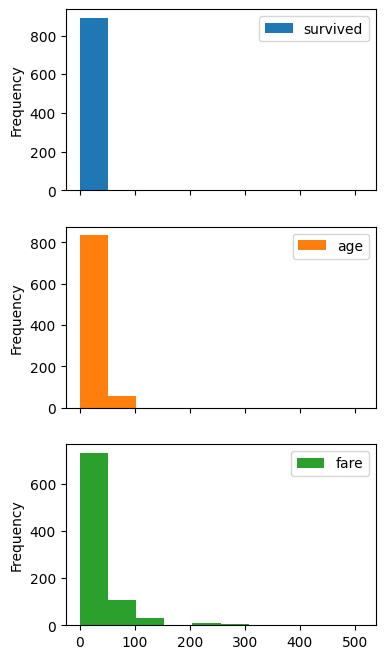

In [19]:
num_col.plot(kind='hist' , subplots=True , figsize=(4,8) )

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

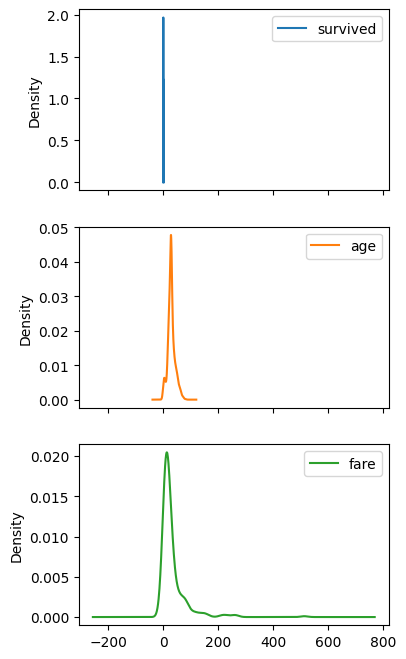

In [20]:
num_col.plot(kind='kde' , subplots=True , figsize=(4,8) )

survived       Axes(0.125,0.11;0.227941x0.77)
age         Axes(0.398529,0.11;0.227941x0.77)
fare        Axes(0.672059,0.11;0.227941x0.77)
dtype: object

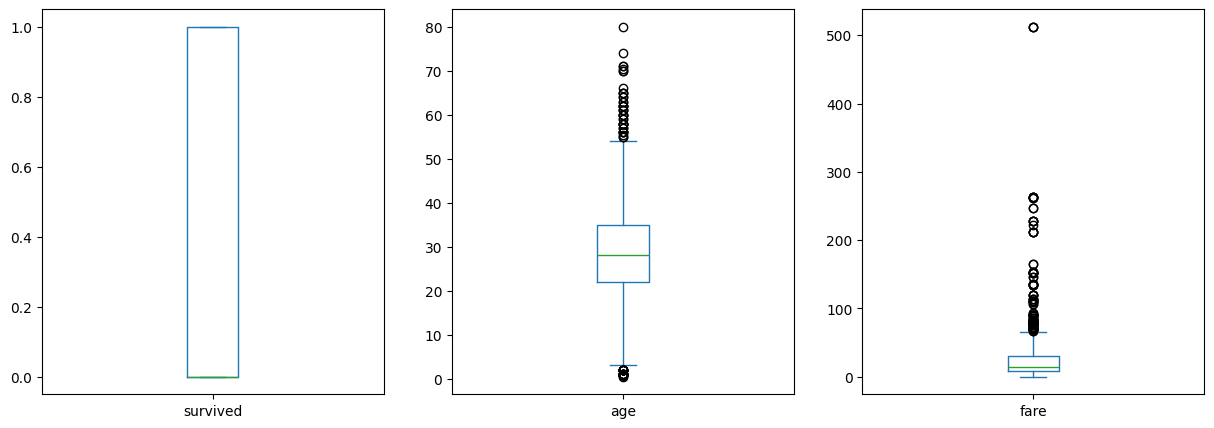

In [21]:
num_col.plot(kind='box' , subplots=True , figsize=(15,5) )

**Data Cleaning**

In [22]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
826,3,male,NaN,0,0,56.4958,S,Third,man,True,Southampton,True
838,3,male,32.0,0,0,56.4958,S,Third,man,True,Southampton,True
763,1,female,36.0,1,2,120.0000,S,First,woman,False,Southampton,False
189,3,male,36.0,0,0,7.8958,S,Third,man,True,Southampton,True
109,3,female,NaN,1,0,24.1500,Q,Third,woman,False,Queenstown,False
...,...,...,...,...,...,...,...,...,...,...,...,...
277,2,male,NaN,0,0,0.0000,S,Second,man,True,Southampton,True
817,2,male,31.0,1,1,37.0042,C,Second,man,True,Cherbourg,False
255,3,female,29.0,0,2,15.2458,C,Third,woman,False,Cherbourg,False
320,3,male,22.0,0,0,7.2500,S,Third,man,True,Southampton,True


In [23]:
X_test

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
770,3,male,24.0,0,0,9.5000,S,Third,man,True,Southampton,True
853,1,female,16.0,0,1,39.4000,S,First,woman,False,Southampton,False
144,2,male,18.0,0,0,11.5000,S,Second,man,True,Southampton,True
141,3,female,22.0,0,0,7.7500,S,Third,woman,False,Southampton,True
261,3,male,3.0,4,2,31.3875,S,Third,child,False,Southampton,False
...,...,...,...,...,...,...,...,...,...,...,...,...
71,3,female,16.0,5,2,46.9000,S,Third,woman,False,Southampton,False
423,3,female,28.0,1,1,14.4000,S,Third,woman,False,Southampton,False
342,2,male,28.0,0,0,13.0000,S,Second,man,True,Southampton,True
825,3,male,NaN,0,0,6.9500,Q,Third,man,True,Queenstown,True


In [24]:
X_train.dtypes

pclass           object
sex              object
age             float64
sibsp            object
parch            object
fare            float64
embarked         object
class          category
who              object
adult_male       object
embark_town      object
alone            object
dtype: object

In [25]:
X_train.isna().sum()

pclass           0
sex              0
age            137
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alone            0
dtype: int64

In [26]:
cat_col = X_train.select_dtypes(include= ['object' , 'category' , 'bool']).columns
num_col = X_train.select_dtypes(exclude= ['object' , 'category' , 'bool']).columns

In [27]:
num_col

Index(['age', 'fare'], dtype='object')

**X_train Preprocessing for categorical colms**

In [28]:
cat_imp = SimpleImputer(strategy='most_frequent')
num_imp = SimpleImputer(strategy='median')
wins = Winsorizer(capping_method='gaussian' , tail = 'both' , fold=3)
std = StandardScaler()
ohe = OneHotEncoder()

In [29]:
cat_imp.fit(X_train[cat_col])
X_train_imp = pd.DataFrame(cat_imp.transform(X_train[cat_col]) , columns=cat_imp.get_feature_names_out())

ohe.fit(X_train_imp)
X_cat = pd.DataFrame(ohe.transform(X_train_imp).toarray() , columns=ohe.get_feature_names_out())
X_cat

,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,...,who_child,who_man,who_woman,adult_male_False,adult_male_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_False,alone_True
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
708,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
709,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
710,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


****X_train Preprocessing for numerical colms****

In [30]:
num_imp.fit(X_train[num_col])
X_num_imp = pd.DataFrame(num_imp.transform(X_train[num_col]) , columns=num_imp.get_feature_names_out())

In [31]:
wins.fit(X_num_imp)
wins_ = pd.DataFrame(wins.transform(X_num_imp) , columns=wins.get_feature_names_out())

In [32]:
std.fit(wins_)
X_1 = pd.DataFrame(std.transform(wins_) , columns=std.get_feature_names_out())
X_1

,age,fare
0,-0.070101,0.665421
1,0.160370,0.665421
2,0.467664,2.318414
3,0.467664,-0.599620
4,-0.070101,-0.176529
...,...,...
707,-0.070101,-0.805145
708,0.083546,0.158062
709,-0.070101,-0.408302
710,-0.607866,-0.616430


**Concatinating categoric and numeric**

In [33]:
X_train  = pd.concat([X_cat , X_1] , axis = 1)
X_train

,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,...,who_woman,adult_male_False,adult_male_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_False,alone_True,age,fare
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.070101,0.665421
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.160370,0.665421
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.467664,2.318414
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.467664,-0.599620
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.070101,-0.176529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.070101,-0.805145
708,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.083546,0.158062
709,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.070101,-0.408302
710,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.607866,-0.616430


**X_test preprocessing for categorical colms**

In [34]:
X_train_imp = pd.DataFrame(cat_imp.transform(X_test[cat_col]) , columns=cat_imp.get_feature_names_out())
X_cat = pd.DataFrame(ohe.transform(X_train_imp).toarray() , columns=ohe.get_feature_names_out())
X_cat

,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,...,who_child,who_man,who_woman,adult_male_False,adult_male_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_False,alone_True
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
175,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
176,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
177,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


**X_test Preprocessing for numerical colms**

In [35]:
num_imp.fit(X_test[num_col])
X_num_imp = pd.DataFrame(num_imp.transform(X_test[num_col]) , columns=num_imp.get_feature_names_out())

wins.fit(X_num_imp)
wins_ = pd.DataFrame(wins.transform(X_num_imp) , columns=wins.get_feature_names_out())

std.fit(wins_)
X_1 = pd.DataFrame(std.transform(wins_) , columns=std.get_feature_names_out())

X_1

,age,fare
0,-0.271387,-0.540768
1,-0.915874,0.415804
2,-0.754752,-0.476783
3,-0.432508,-0.596754
4,-1.963165,0.159465
...,...,...
174,-0.915874,0.655746
175,0.050857,-0.384005
176,0.050857,-0.428794
177,-0.110265,-0.622348


In [36]:
X_test  = pd.concat([X_cat , X_1] , axis = 1)
X_test

,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,...,who_woman,adult_male_False,adult_male_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_False,alone_True,age,fare
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.271387,-0.540768
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.915874,0.415804
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.754752,-0.476783
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.432508,-0.596754
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.963165,0.159465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.915874,0.655746
175,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.050857,-0.384005
176,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.050857,-0.428794
177,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.110265,-0.622348


**Model Building**

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train , y_train)
y_predict = knn.predict(X_test.values)
y_predict

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

**Model Evaluation**

In [39]:
from sklearn.metrics import accuracy_score , classification_report

In [40]:
accuracy_score(y_test , y_predict)

0.7932960893854749

In [41]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       110
           1       0.81      0.61      0.69        69

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.80      0.79      0.79       179

